In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
#pd.set_option("display.max_columns", None)
df

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,...,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,...,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,...,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,...,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,...,0,6,182129.0,263,93775,N,5817,102,0,1051004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,Y,8,NaN,NaN,...,0,4,191642.0,209,38222,N,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,Y,8,NaN,NaN,...,0,13,102338.0,192,90135,N,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,Y,8,NaN,NaN,...,0,29,234618.0,373,79246,N,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,Y,2,NaN,NaN,...,0,24,215218.0,373,79246,N,5817,102,0,338215


In [3]:
df.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,4.149114e+00,1.337572e-02,4.749410e+00,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,2.394259e+00,1.148774e-01,1.111927e+00,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


In [4]:
df.dtypes

acqic          int64
bacno          int64
cano           int64
conam        float64
contp          int64
csmcu          int64
ecfg          object
etymd          int64
flbmk         object
flg_3dsmk     object
fraud_ind      int64
hcefg          int64
insfg         object
iterm          int64
locdt          int64
loctm        float64
mcc            int64
mchno          int64
ovrlt         object
scity          int64
stocn          int64
stscd          int64
txkey          int64
dtype: object

In [5]:
# 盜刷只佔了資料的 1%

df['fraud_ind'].value_counts(normalize=True)

0    0.986624
1    0.013376
Name: fraud_ind, dtype: float64

<AxesSubplot:xlabel='fraud_ind', ylabel='count'>

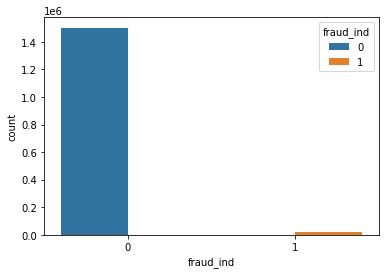

In [6]:
sns.countplot(x='fraud_ind',hue='fraud_ind',data=df)

In [7]:
# 僅有兩個特徵有缺失
df.isnull().sum()

acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64

In [8]:
df_1 = df.replace({'Y':1,'N':0})
df_1

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0.0,0.0,...,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0.0,0.0,...,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0.0,0.0,...,0,6,152458.0,457,59333,0,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,0,5,0.0,0.0,...,0,5,172946.0,247,50436,0,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,0,4,0.0,0.0,...,0,6,182129.0,263,93775,0,5817,102,0,1051004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,1,8,NaN,NaN,...,0,4,191642.0,209,38222,0,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,1,8,NaN,NaN,...,0,13,102338.0,192,90135,0,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,1,8,NaN,NaN,...,0,29,234618.0,373,79246,0,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,1,2,NaN,NaN,...,0,24,215218.0,373,79246,0,5817,102,0,338215


In [9]:
df_1.describe()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.509206e+06,1.509206e+06,...,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,2.544870e-01,4.149114e+00,3.361370e-03,4.263103e-02,...,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,1.330738e-02,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,4.355726e-01,2.394259e+00,5.787982e-02,2.020239e-01,...,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.145875e-01,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,0.000000e+00,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,...,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,1.000000e+00,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


In [10]:
df_1['flbmk'].value_counts(normalize=True)

0.0    0.996639
1.0    0.003361
Name: flbmk, dtype: float64

In [11]:
df_1['flg_3dsmk'].value_counts(normalize=True)

0.0    0.957369
1.0    0.042631
Name: flg_3dsmk, dtype: float64

In [12]:
# 確認有90天的資料
df_1['locdt'].value_counts(sort=False)

1     17826
2     18405
3     17809
4     16213
5     16072
      ...  
86    17564
87    17832
88    16751
89    15713
90    17026
Name: locdt, Length: 90, dtype: int64

In [13]:
df_1.corr()['fraud_ind'].abs()

acqic        0.083684
bacno        0.000285
cano         0.004608
conam        0.016634
contp        0.023248
csmcu        0.013472
ecfg         0.161701
etymd        0.067743
flbmk        0.001918
flg_3dsmk    0.021697
fraud_ind    1.000000
hcefg        0.026210
insfg        0.018403
iterm        0.014662
locdt        0.011773
loctm        0.042688
mcc          0.002827
mchno        0.012187
ovrlt        0.018177
scity        0.028715
stocn        0.161405
stscd        0.279225
txkey        0.034034
Name: fraud_ind, dtype: float64

In [14]:
df_1.corr()['flbmk'].abs()

acqic        0.017307
bacno        0.001190
cano         0.016751
conam        0.025145
contp        0.015079
csmcu        0.021004
ecfg         0.033646
etymd        0.110348
flbmk        1.000000
flg_3dsmk    0.012255
fraud_ind    0.001918
hcefg        0.014607
insfg        0.003353
iterm        0.002851
locdt        0.003728
loctm        0.008179
mcc          0.022958
mchno        0.031751
ovrlt        0.000698
scity        0.014933
stocn        0.013160
stscd        0.001741
txkey        0.017746
Name: flbmk, dtype: float64

In [15]:
df_1.corr()['flg_3dsmk'].abs()

acqic        0.053026
bacno        0.003945
cano         0.024940
conam        0.043812
contp        0.052545
csmcu        0.079984
ecfg         0.364234
etymd        0.136920
flbmk        0.012255
flg_3dsmk    1.000000
fraud_ind    0.021697
hcefg        0.012023
insfg        0.007196
iterm        0.007996
locdt        0.005314
loctm        0.006118
mcc          0.077561
mchno        0.044549
ovrlt        0.001632
scity        0.080245
stocn        0.042232
stscd        0.020665
txkey        0.040939
Name: flg_3dsmk, dtype: float64

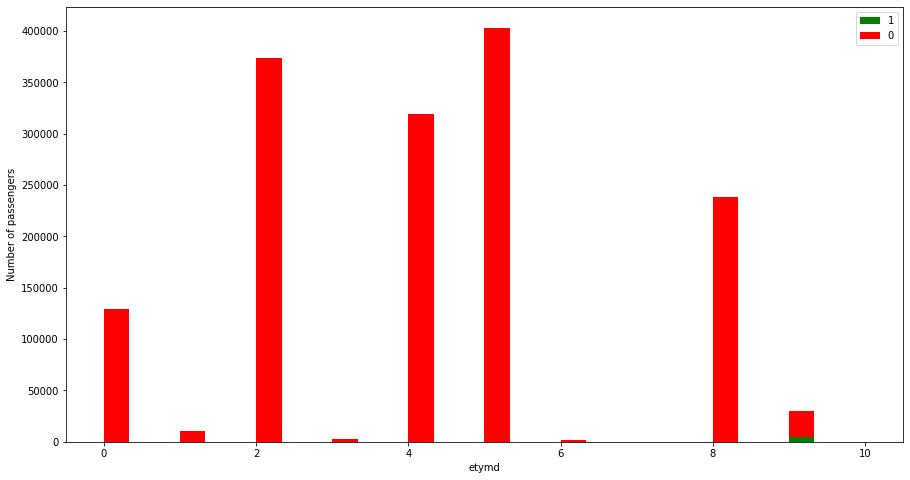

In [16]:
figure = plt.figure(figsize=(15,8))
plt.hist([df_1[df_1['flbmk']==1]['etymd'], df_1[df_1['flbmk']==0]['etymd']], stacked=True, color = ['g','r'],
         bins = 30,label = ['1','0'])
plt.xlabel('etymd')
plt.ylabel('Number of passengers')
plt.legend()

In [17]:
df_1.loc[(df['etymd'] != 9 ) & (df_1['flbmk'].isnull()), 'flbmk'] = 0
df_1.loc[(df['etymd'] == 9 ) & (df_1['flbmk'].isnull()), 'flbmk'] = 1

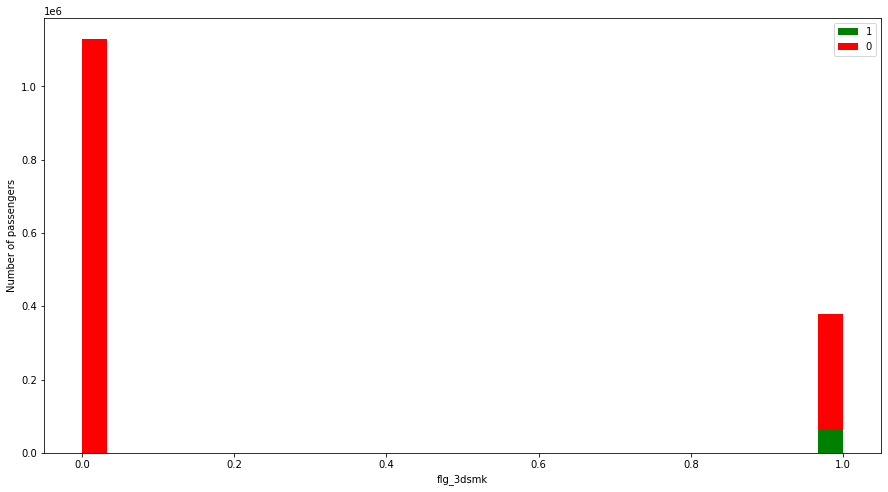

In [18]:
figure = plt.figure(figsize=(15,8))
plt.hist([df_1[df_1['flg_3dsmk']==1]['ecfg'], df_1[df_1['flg_3dsmk']==0]['ecfg']], stacked=True, color = ['g','r'],
         bins = 30,label = ['1','0'])
plt.xlabel('flg_3dsmk')
plt.ylabel('Number of passengers')
plt.legend()

In [19]:
df_1.loc[(df['ecfg'] != 1 ) & (df_1['flg_3dsmk'].isnull()), 'flg_3dsmk'] = 0
df_1.loc[(df['ecfg'] == 1 ) & (df_1['flg_3dsmk'].isnull()), 'flg_3dsmk'] = 1

In [20]:
df_1.isnull().sum()

acqic        0
bacno        0
cano         0
conam        0
contp        0
csmcu        0
ecfg         0
etymd        0
flbmk        0
flg_3dsmk    0
fraud_ind    0
hcefg        0
insfg        0
iterm        0
locdt        0
loctm        0
mcc          0
mchno        0
ovrlt        0
scity        0
stocn        0
stscd        0
txkey        0
dtype: int64

In [21]:
df_1

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0.0,0.0,...,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0.0,0.0,...,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0.0,0.0,...,0,6,152458.0,457,59333,0,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,0,5,0.0,0.0,...,0,5,172946.0,247,50436,0,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,0,4,0.0,0.0,...,0,6,182129.0,263,93775,0,5817,102,0,1051004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,1,8,0.0,0.0,...,0,4,191642.0,209,38222,0,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,1,8,0.0,0.0,...,0,13,102338.0,192,90135,0,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,1,8,0.0,0.0,...,0,29,234618.0,373,79246,0,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,1,2,0.0,0.0,...,0,24,215218.0,373,79246,0,5817,102,0,338215


In [22]:
# 第一類為唯一代碼
# 第二類為時間
# 第三類為Y/N註記
# 第四類為類別型態，可轉onehotencoder的類別
# 第五類為數值型態，可做標準化
# 第六類為盜刷註記

# 重新組成新的df欄位順序，以便後續選取欄位


df_1_1 = df_1[['txkey']]
df_1_2 = df_1[['locdt','loctm']]
df_1_3 = df_1[['ecfg','flbmk','flg_3dsmk','insfg','ovrlt']]
df_1_4 = df_1[['contp','csmcu','etymd','hcefg','iterm','stocn','stscd']]
df_1_5 = df_1[['bacno','cano','acqic','conam','mcc','mchno','scity']]
df_1_6 = df_1[['fraud_ind']]
df_2 = pd.concat([df_1_1,df_1_2,df_1_3,df_1_4,df_1_5,df_1_6], axis=1, join='inner')
df_2

,txkey,locdt,loctm,ecfg,flbmk,flg_3dsmk,insfg,ovrlt,contp,csmcu,...,stocn,stscd,bacno,cano,acqic,conam,mcc,mchno,scity,fraud_ind
0,516056,33,172652.0,0,0.0,0.0,0,0,5,0,...,102,0,113261,38038,6881,513.80,457,59333,0,0
1,4376,9,105114.0,0,0.0,0.0,0,0,5,0,...,102,0,134508,45725,0,465.62,451,0,5817,0
2,483434,6,152458.0,0,0.0,0.0,0,0,5,0,...,102,0,15408,188328,6881,513.80,457,59333,0,0
3,1407164,5,172946.0,0,0.0,0.0,0,0,5,62,...,102,0,157159,29967,6716,1016.11,247,50436,3281,0
4,1051004,6,182129.0,0,0.0,0.0,0,0,5,62,...,102,0,105985,81305,5975,713.66,263,93775,5817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,1478280,4,191642.0,1,0.0,0.0,0,0,5,75,...,102,0,91008,15189,6322,578.38,209,38222,5817,0
1521783,661087,13,102338.0,1,0.0,0.0,0,0,5,75,...,102,0,145107,116252,3226,435.32,192,90135,1458,0
1521784,167073,29,234618.0,1,0.0,0.0,0,0,5,75,...,102,0,162168,93598,6769,1.38,373,79246,5817,0
1521785,338215,24,215218.0,1,0.0,0.0,0,0,5,75,...,102,0,45406,197460,6032,1.38,373,79246,5817,0


### Onehot encoder (pandas)

In [23]:
# 只接受字串
col_type = ['contp','csmcu','etymd','hcefg','iterm','stocn','stscd','locdt']
df_2[col_type] = df_2[col_type].astype('object')

def dummy(list):
    df_list=[]
    for i in list:
        df_list.append(pd.get_dummies(df_2[[i]]))
    df_2_new = pd.concat(df_list, axis=1, join='inner')
    return df_2_new

df_2 = pd.concat([df_2,dummy(col_type)], axis=1, join='inner')
df_2.shape

(1521787, 329)

### Onehot encoder (sklearn)

In [24]:
# from sklearn.preprocessing import OneHotEncoder

# col_type = ['contp','csmcu','etymd','hcefg','iterm','stocn','stscd','locdt']

# def onehot(list):
#     df_list=[]
#     for i in list:
#         df_onehot = OneHotEncoder(sparse=False)
#         s = df_onehot.fit_transform(df_2[[i]])
#         df_s = pd.DataFrame(s)
#         df_list.append(df_s)
#     df_2_new = pd.concat(df_list, axis=1, join='inner')
#     return df_2_new

# df_2 = pd.concat([df_2,onehot(col_type)], axis=1, join='inner')
# df_2.shape

In [25]:
df_2 = df_2.drop(['contp','csmcu','etymd','hcefg','iterm','stocn','stscd','locdt','fraud_ind'], axis = 1)
df_2.shape

(1521787, 320)

In [26]:
df_2 = pd.concat([df_2,df_1['locdt'],df_1['fraud_ind']], axis=1, join='inner')
df_2

,txkey,loctm,ecfg,flbmk,flg_3dsmk,insfg,ovrlt,bacno,cano,acqic,...,locdt_83,locdt_84,locdt_85,locdt_86,locdt_87,locdt_88,locdt_89,locdt_90,locdt,fraud_ind
0,516056,172652.0,0,0.0,0.0,0,0,113261,38038,6881,...,0,0,0,0,0,0,0,0,33,0
1,4376,105114.0,0,0.0,0.0,0,0,134508,45725,0,...,0,0,0,0,0,0,0,0,9,0
2,483434,152458.0,0,0.0,0.0,0,0,15408,188328,6881,...,0,0,0,0,0,0,0,0,6,0
3,1407164,172946.0,0,0.0,0.0,0,0,157159,29967,6716,...,0,0,0,0,0,0,0,0,5,0
4,1051004,182129.0,0,0.0,0.0,0,0,105985,81305,5975,...,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,1478280,191642.0,1,0.0,0.0,0,0,91008,15189,6322,...,0,0,0,0,0,0,0,0,4,0
1521783,661087,102338.0,1,0.0,0.0,0,0,145107,116252,3226,...,0,0,0,0,0,0,0,0,13,0
1521784,167073,234618.0,1,0.0,0.0,0,0,162168,93598,6769,...,0,0,0,0,0,0,0,0,29,0
1521785,338215,215218.0,1,0.0,0.0,0,0,45406,197460,6032,...,0,0,0,0,0,0,0,0,24,0


### 標準化

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
col = ['bacno','cano','acqic','conam','mcc','mchno','scity','loctm']
df_2[col] = scaler.fit_transform(df_2[col])
df_2

,txkey,loctm,ecfg,flbmk,flg_3dsmk,insfg,ovrlt,bacno,cano,acqic,...,locdt_83,locdt_84,locdt_85,locdt_86,locdt_87,locdt_88,locdt_89,locdt_90,locdt,fraud_ind
0,516056,0.505301,0,0.0,0.0,0,0,0.658131,-1.163791,0.581061,...,0,0,0,0,0,0,0,0,33,0
1,4376,-0.790491,0,0.0,0.0,0,0,1.106735,-1.037575,-3.998885,...,0,0,0,0,0,0,0,0,9,0
2,483434,0.117856,0,0.0,0.0,0,0,-1.407913,1.303879,0.581061,...,0,0,0,0,0,0,0,0,6,0
3,1407164,0.510941,0,0.0,0.0,0,0,1.584983,-1.296311,0.471238,...,0,0,0,0,0,0,0,0,5,0
4,1051004,0.687127,0,0.0,0.0,0,0,0.504508,-0.453373,-0.021966,...,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,1478280,0.869645,1,0.0,0.0,0,0,0.188287,-1.538957,0.208994,...,0,0,0,0,0,0,0,0,4,0
1521783,661087,-0.843751,1,0.0,0.0,0,0,1.330520,0.120435,-1.851682,...,0,0,0,0,0,0,0,0,13,0
1521784,167073,1.694187,1,0.0,0.0,0,0,1.690742,-0.251529,0.506515,...,0,0,0,0,0,0,0,0,29,0
1521785,338215,1.321976,1,0.0,0.0,0,0,-0.774543,1.453821,0.015972,...,0,0,0,0,0,0,0,0,24,0


### 降維

In [228]:
# from sklearn.decomposition import PCA

# df_pca= df_2.iloc[:,1:320]
# pca = PCA(n_components=0.95)
# new_pca = pca.fit_transform(df_pca)
# print(pca.explained_variance_ratio_)
# print(pca.n_components_)

[0.17577256 0.10927031 0.09704329 0.09074706 0.08847954 0.08511483
 0.06547821 0.05219202 0.03045968 0.02199049 0.02006899 0.00998454
 0.00853125 0.00772352 0.00554545 0.00499611 0.00378227 0.00323707
 0.00278435 0.00272066 0.00238471 0.00219502 0.00184122 0.00176341
 0.00160233 0.00142147 0.00136495 0.00128379 0.00123462 0.00118902
 0.00117151 0.00115872 0.00114577 0.00113097 0.00111869 0.00111711
 0.00111452 0.00110538 0.00110267 0.0010998  0.001096   0.00109565
 0.00108992 0.00108908 0.00108733 0.00108634 0.00108513 0.00108249
 0.00108039 0.00107738 0.00107192 0.0010653  0.00106251 0.00106179
 0.00106155 0.00106046 0.00105872 0.00105797 0.00105541 0.00105179
 0.00104905 0.00104434 0.00104223 0.00104072 0.0010385  0.00103695
 0.00103156 0.00102582 0.0010197  0.0010174  0.00101649 0.00101545
 0.0010139  0.00101024 0.00100792]
75


In [229]:
# col=[]
# for i in range(1,76):
#     col.append('p'+str(i))

# df_new_pca = pd.DataFrame(data = new_pca, columns = col)
# df_2 = pd.concat([df_new_pca,df_2['locdt'],df_2['fraud_ind']], axis=1, join='inner')
# df_2

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p68,p69,p70,p71,p72,p73,p74,p75,locdt,fraud_ind
0,2.278384,-2.494940,1.620803,-0.525727,0.238644,-0.628138,-0.279193,-0.168176,-0.128791,-0.036249,...,0.024365,-0.012974,-0.002928,0.020839,0.009537,-0.003765,-0.008126,0.040080,33,0
1,3.793647,2.985255,0.665879,-0.954563,-0.413722,-1.421327,1.565492,-0.647716,0.600833,0.372782,...,-0.045711,0.007404,0.008224,-0.010820,0.001718,0.001919,-0.004565,-0.026925,9,0
2,2.566895,-2.476131,-0.132785,1.274129,-0.146007,1.333378,-0.511135,-0.345215,-0.019037,-0.029047,...,0.013042,-0.007097,-0.005417,0.001661,-0.006400,-0.000330,0.024068,-0.000430,6,0
3,-0.729188,-0.463718,1.564740,-1.486621,-0.116485,-0.514118,-0.342620,0.784424,0.580836,0.070631,...,0.011050,-0.010116,-0.007593,-0.009655,-0.012687,0.003805,0.047916,-0.028783,5,0
4,-1.130320,-0.414216,0.118108,-0.481846,0.289906,-0.394104,1.072588,0.024578,0.389965,-0.221355,...,0.017294,-0.006098,-0.005353,0.002282,-0.004250,-0.001357,0.020022,0.001276,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,-0.848995,0.415107,0.611498,-0.118171,-0.788360,-1.560865,-0.053129,0.781796,-0.721566,-0.294265,...,-0.013885,0.028746,-0.007311,-0.014557,-0.012389,-0.007005,0.020494,-0.058070,4,0
1521783,1.080018,0.130553,-1.078730,-1.224330,1.276022,-0.534871,0.636193,2.615234,0.317704,-0.064641,...,-0.175581,0.055753,0.016564,-0.017049,-0.002299,-0.012508,-0.044269,-0.075440,13,0
1521784,0.094305,-1.298686,-0.734717,-1.761621,-0.539856,-1.468145,0.895258,-0.910371,-1.273393,-0.711198,...,-0.043431,0.027400,0.001873,0.001030,0.013961,-0.003879,-0.042722,-0.003411,29,0
1521785,0.542384,-0.984230,-2.034262,0.513355,-0.817810,-0.065805,1.030948,-1.185294,-0.984280,0.359795,...,-0.082429,0.023497,0.000699,-0.014851,-0.005729,-0.007648,-0.001289,-0.059528,24,0


### 分割trani test data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# # 依時間90天分割 訓練集 : 測試集 = 7 : 3

# train = df_2[df_2['locdt']<63]
# test = df_2[df_2['locdt']>=63]

# x_train = train.iloc[:,1:321]
# x_test = test.iloc[:,1:321]
# y_train = train.iloc[:,-1]
# y_test = test.iloc[:,-1]
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [35]:
# #  隨機分割
# #train = df_2.iloc[:,0:75]
# train = df_2.iloc[:,1:320]
# label = df_2.iloc[:,-1]
# x_train,x_test,y_train,y_test = train_test_split(train,label,test_size = 0.3 , random_state=42)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1065250, 319), (456537, 319), (1065250,), (456537,))

In [36]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(0    0.986639
 1    0.013361
 Name: fraud_ind, dtype: float64,
 0    0.98659
 1    0.01341
 Name: fraud_ind, dtype: float64)

In [94]:
#  訓練集 驗證集 測試集分割

train = df_2[df_2['locdt']<72]
test = df_2[df_2['locdt']>=72]
x_train_ver = train.iloc[:,1:320]
x_test = test.iloc[:,1:320]
y_train_ver = train.iloc[:,-1]
y_test = test.iloc[:,-1]
x_train,x_ver,y_train,y_ver = train_test_split(x_train_ver,y_train_ver,test_size = 0.25 , random_state=42,shuffle = False)
x_train.shape,x_ver.shape,y_train.shape,y_ver.shape,x_test.shape,y_test.shape

((900962, 319), (300321, 319), (900962,), (300321,), (320504, 319), (320504,))

### 數據不平衡

In [104]:
# from imblearn.over_sampling import SMOTE

In [108]:
# smote = SMOTE(random_state=42)
# x_train_new,y_train_new = smote.fit_sample(x_train.values,y_train.values)

### 決策樹

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

In [110]:
# 建立模型與訓練模型
tStart = time.time()
tree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5, random_state=10)
tree_clf = tree.fit(x_train_new, y_train_new)
score = tree_clf.score(x_ver,y_ver)
tEnd = time.time()
print('決策樹分數為{:.5f}:'.format(score))
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

決策樹分數為0.90192:
計算時間:71.60秒


In [99]:
# 交叉驗證

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import KFold, cross_validate,TimeSeriesSplit

tStart = time.time()
scoring = {'accuracy' : make_scorer(accuracy_score), 
      'precision' : make_scorer(precision_score), 
      'recall' : make_scorer(recall_score), 
      'f1_score' : make_scorer(f1_score)} 

model=tree_clf
tss = TimeSeriesSplit(max_train_size=None, n_splits=10)
results = cross_validate(estimator=model, 
              X=x_train_ver, 
              y=y_train_ver, 
              cv=tss, 
              scoring=scoring)
tEnd = time.time()

In [100]:
print('f1 k折後各別分數:',results['test_f1_score'])
print('f1 平均分數為:',results['test_f1_score'].mean())
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

f1 k折後各別分數: [0.41773836 0.47035573 0.45127305 0.45656028 0.48447748 0.48347272
 0.47986716 0.453016   0.46521739 0.43481595]
f1 平均分數為: 0.45967941324016115
計算時間:140.72秒


In [111]:
# 驗證模型

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

tStart = time.time()
y_pre = tree_clf.predict(x_test)
matrix=confusion_matrix(y_test,y_pre)
accuracy = accuracy_score(y_test,y_pre)
f1 = f1_score(y_test, y_pre)
tEnd = time.time()
print(matrix)
print('模型分數為{:.5f}:'.format(accuracy))
print('f1 分數為{:.5f}:'.format(f1))
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

[[286456  31047]
 [   298   2703]]
模型分數為0.90220:
f1 分數為0.14710:
計算時間:0.67秒


### 隨機森林

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,roc_auc_score

In [74]:
# 建立隨機森林模型 與 訓練模型

tStart = time.time()
rnd_clf = RandomForestClassifier(criterion='gini',n_estimators = 200,n_jobs = -1,)
rnd_clf.fit(x_train, y_train)
score = rnd_clf.score(x_test,y_test)
tEnd = time.time()
print('隨機森林分數為{:.5f}:'.format(score))
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

隨機森林分數為0.99231:
計算時間:198.88秒


In [79]:
# 交叉驗證

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import KFold, cross_validate,TimeSeriesSplit

tStart = time.time()
scoring = {'accuracy' : make_scorer(accuracy_score), 
      'precision' : make_scorer(precision_score), 
      'recall' : make_scorer(recall_score), 
      'f1_score' : make_scorer(f1_score)} 

model=rnd_clf
tss = TimeSeriesSplit(max_train_size=None, n_splits=10)
results = cross_validate(estimator=model, 
              X=x_train_ver, 
              y=y_train_ver, 
              cv=tss, 
              scoring=scoring)
tEnd = time.time()

In [80]:
print('f1 k折後各別分數:',results['test_f1_score'])
print('f1 平均分數為:',results['test_f1_score'].mean())
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

f1 k折後各別分數: [0.54798089 0.63618901 0.6712     0.69509252 0.72437888 0.73359913
 0.7338023  0.73871907 0.75143623 0.74390244]
f1 平均分數為: 0.6976300471584593
計算時間:1257.03秒


In [49]:
# 驗證模型

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

tStart = time.time()
y_pre = rnd_clf.predict(x_test)
matrix=confusion_matrix(y_test,y_pre)
accuracy = accuracy_score(y_test,y_pre)
f1 = f1_score(y_test, y_pre)
tEnd = time.time()
print(matrix)
print('模型分數為{:.5f}:'.format(accuracy))
print('f1 分數為{:.5f}:'.format(f1))
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

[[449981    434]
 [  2313   3809]]
模型分數為0.99398:
f1 分數為0.73497:
計算時間:8.98秒


In [47]:
# import pickle

# # 儲存模型
# filename = 'RandomForest_model_001.sav'
# pickle.dump(rnd_clf, open(filename, 'wb'))

In [48]:
# # 取出模型

# filename = 'RandomForest_model_001.sav'
# model = pickle.load(open(filename, 'rb'))

### XGBoost

In [81]:
from xgboost import XGBClassifier

In [83]:
# 建立隨機森林模型 與 訓練模型

tStart = time.time()
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       subsample=1)
xgb.fit(x_train, y_train)
xgb.score(x_ver,y_ver)
tEnd = time.time()
print('隨機森林分數為{:.5f}:'.format(score))
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

隨機森林分數為0.99231:
計算時間:1240.33秒


In [84]:
# 交叉驗證

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import KFold, cross_validate,TimeSeriesSplit

tStart = time.time()
scoring = {'accuracy' : make_scorer(accuracy_score), 
      'precision' : make_scorer(precision_score), 
      'recall' : make_scorer(recall_score), 
      'f1_score' : make_scorer(f1_score)} 

model=xgb
tss = TimeSeriesSplit(max_train_size=None, n_splits=10)
results = cross_validate(estimator=model, 
              X=x_train_ver, 
              y=y_train_ver, 
              cv=tss, 
              scoring=scoring)
tEnd = time.time()
print('f1 k折後各別分數:',results['test_f1_score'])
print('f1 平均分數為:',results['test_f1_score'].mean())
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

f1 k折後各別分數: [0.55255505 0.60978385 0.63517915 0.6464315  0.65886153 0.67212505
 0.65371162 0.65362486 0.66774064 0.63438438]
f1 平均分數為: 0.6384397617485033
計算時間:7669.97秒


In [85]:
# 驗證模型

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

tStart = time.time()
y_pre = xgb.predict(x_test)
matrix=confusion_matrix(y_test,y_pre)
accuracy = accuracy_score(y_test,y_pre)
f1 = f1_score(y_test, y_pre)
tEnd = time.time()
print(matrix)
print('模型分數為{:.5f}:'.format(accuracy))
print('f1 分數為{:.5f}:'.format(f1))
print('計算時間:{:.2f}秒'.format(tEnd-tStart))

[[317198    305]
 [  2151    850]]
模型分數為0.99234:
f1 分數為0.40905:
計算時間:4.41秒
